In [1]:
import torch
from torch_geometric.loader import DataLoader as GraphDataLoader

import src.utils as utils
from src.models.gnn import GraphConvolutionalNetwork
from src.featurizers import GraphFeaturizer
from src.splitters import ScaffoldSplitter
from src.early_stopping import EarlyStopping
from src.grad_cam import plot_grad_cam_explanation


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Skipped loading some Tensorflow models, missing a dependency. No module named 'tensorflow'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'dgl'
Skipped loading modules with transformers dependency. No module named 'transformers'
cannot import name 'HuggingFaceModel' from 'deepchem.models.torch_models' (c:\Users\kamil\anaconda3\envs\test\lib\site-packages\deepchem\models\torch_models\__init__.py)
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'lightning'
Skipped loading some Jax models, missing a dependency. No module named 'jax'
Skipped loading some PyTorch models, missing a dependency. No module named 'tensorflow'


In [2]:
datasets = utils.load_data()
target_names = utils.get_data_target_field_names()

data, target_name = datasets[1], target_names[1]

splitter = ScaffoldSplitter()
train, test = splitter.train_test_molecules_split(data, target_name)

In [3]:
featurizer = GraphFeaturizer(y_col=target_name, log_target_transform=True)
graph_train = featurizer(train)
graph_test = featurizer(test)

batch_size = 64
graph_train_loader = GraphDataLoader(graph_train, batch_size, shuffle=True)
graph_test_loader = GraphDataLoader(graph_test, batch_size)

In [34]:
hidden_size = 128
n_layers = 3
model_path = "gnn1.pth"
gnn = GraphConvolutionalNetwork(graph_train[0].x.shape[1], hidden_size=hidden_size, n_layers=n_layers).to(device)
early_stopping = EarlyStopping(patience=40, min_delta=0.001)
gnn.train_model(graph_train_loader, graph_test_loader, epochs=9999, lr=0.02, early_stopping=early_stopping)
torch.save(gnn.state_dict(), model_path)

Epoch: 0, train loss: 10.1584, test loss: 5.2247
Epoch: 1, train loss: 3.6346, test loss: 3.4802
Epoch: 2, train loss: 3.5640, test loss: 3.3463
Epoch: 3, train loss: 3.5664, test loss: 3.5176
Epoch: 4, train loss: 3.6675, test loss: 3.1658
Epoch: 5, train loss: 3.5517, test loss: 3.2871
Epoch: 6, train loss: 3.3878, test loss: 3.2108
Epoch: 7, train loss: 3.5214, test loss: 3.1079
Epoch: 8, train loss: 3.3243, test loss: 3.1094
Epoch: 9, train loss: 3.4675, test loss: 4.0100
Epoch: 10, train loss: 3.4847, test loss: 3.0936
Epoch: 11, train loss: 3.4632, test loss: 3.4737
Epoch: 12, train loss: 3.4241, test loss: 3.8324
Epoch: 13, train loss: 3.3643, test loss: 3.0686
Epoch: 14, train loss: 3.2491, test loss: 3.2091
Epoch: 15, train loss: 3.3100, test loss: 3.1617
Epoch: 16, train loss: 3.4018, test loss: 3.0978
Epoch: 17, train loss: 3.1679, test loss: 3.3332
Epoch: 18, train loss: 3.3268, test loss: 3.1876
Epoch: 19, train loss: 3.3193, test loss: 3.4036
Epoch: 20, train loss: 3.1387

In [4]:
hidden_size = 128
n_layers = 3
model_path = "gnn1.pth"
gnn = GraphConvolutionalNetwork(graph_train[0].x.shape[1], hidden_size=hidden_size, n_layers=n_layers).to(device)
gnn.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [5]:
gnn.r2_score(graph_test_loader)

0.41269925236701965

c:\Users\kamil\OneDrive\Pulpit\przedmioty\semestr 8\ml w lekach\projekt\src\grad_cam.py:55: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.mse_loss(output, y)


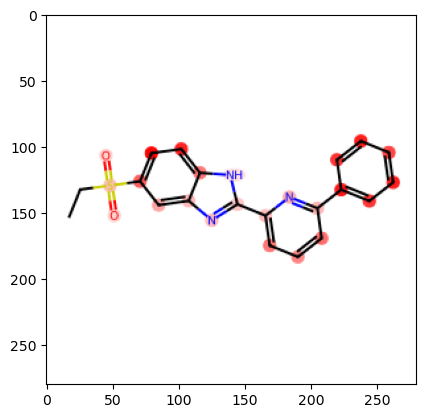

In [31]:
mol_index = 42
plot_grad_cam_explanation(gnn, test[mol_index], graph_test[mol_index])